In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Constants
TODAY = pd.Timestamp('today')
DATE_FORMAT = '%m/%d/%Y' 

base_dir = Path.cwd()
data_file = base_dir.parent / 'data' / 'raw_hr_dataset.csv'

# Load the dataset
hr_data = pd.read_csv(data_file)

# Basic information about the dataset to understand its structure
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [5]:
# Show first 5 rows of the dataset
hr_data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


## Data Exploration & Cleaning

In [6]:
# Convert relevanmt columns to datetime format
hr_data['DOB'] = pd.to_datetime(hr_data['DOB'], format=DATE_FORMAT, errors='coerce')
hr_data['DateofHire'] = pd.to_datetime(hr_data['DateofHire'], format=DATE_FORMAT, errors='coerce')
hr_data['DateofTermination'] = pd.to_datetime(hr_data['DateofTermination'], format=DATE_FORMAT, errors='coerce')

# Validate date conversion
if hr_data[['DOB', 'DateofHire']].isnull().any().any():
    print("Warning: Some dates could not be parsed. Check the original dataset.")

# Calculate tenure in years (for terminated and active employees)
hr_data['TenureYears'] = (
    (hr_data['DateofTermination'].fillna(TODAY) - hr_data['DateofHire']).dt.days / 365
).round(2)

# Create Turnover indicator: 1 if terminated, 0 otherwise
hr_data['Turnover'] = hr_data['DateofTermination'].notnull().astype(int)

# Select a subset of relevant columns for analysis
columns_to_keep = [
    'EmpID', 'Sex', 'RaceDesc', 'MaritalDesc', 'Salary', 'TenureYears',
    'Department', 'PerformanceScore', 'EmpSatisfaction', 'Turnover'
]
cleaned_hr_data = hr_data[columns_to_keep]

cleaned_hr_data.info()

# Save cleaned data to the `data` directory for reproducibility
output_file = base_dir.parent / 'data' / 'cleaned_hr_data.csv'
cleaned_hr_data.to_csv(output_file, index=False)
print(f"Cleaned dataset saved to: {output_file}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmpID             311 non-null    int64  
 1   Sex               311 non-null    object 
 2   RaceDesc          311 non-null    object 
 3   MaritalDesc       311 non-null    object 
 4   Salary            311 non-null    int64  
 5   TenureYears       311 non-null    float64
 6   Department        311 non-null    object 
 7   PerformanceScore  311 non-null    object 
 8   EmpSatisfaction   311 non-null    int64  
 9   Turnover          311 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 24.4+ KB
Cleaned dataset saved to: /Users/borjagonzalez/Desktop/Data/Personal data projects/people_analytics_turnover/data/cleaned_hr_data.csv


In [7]:
cleaned_hr_data.head()

,EmpID,Sex,RaceDesc,MaritalDesc,Salary,TenureYears,Department,PerformanceScore,EmpSatisfaction,Turnover
0,10026,M,White,Single,62506,13.50,Production,Exceeds,5,0
1,10084,M,White,Married,104437,1.22,IT/IS,Fully Meets,3,1
2,10196,F,White,Married,64955,1.22,Production,Fully Meets,3,1
3,10088,F,White,Married,64991,16.99,Production,Fully Meets,5,0
4,10069,F,White,Divorced,50825,5.16,Production,Fully Meets,4,1


/var/folders/97/w9b7ss_x2v9cnl2428tqps580000gn/T/ipykernel_11083/415057029.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=turnover_rate_by_dept.values, y=turnover_rate_by_dept.index, palette="coolwarm")


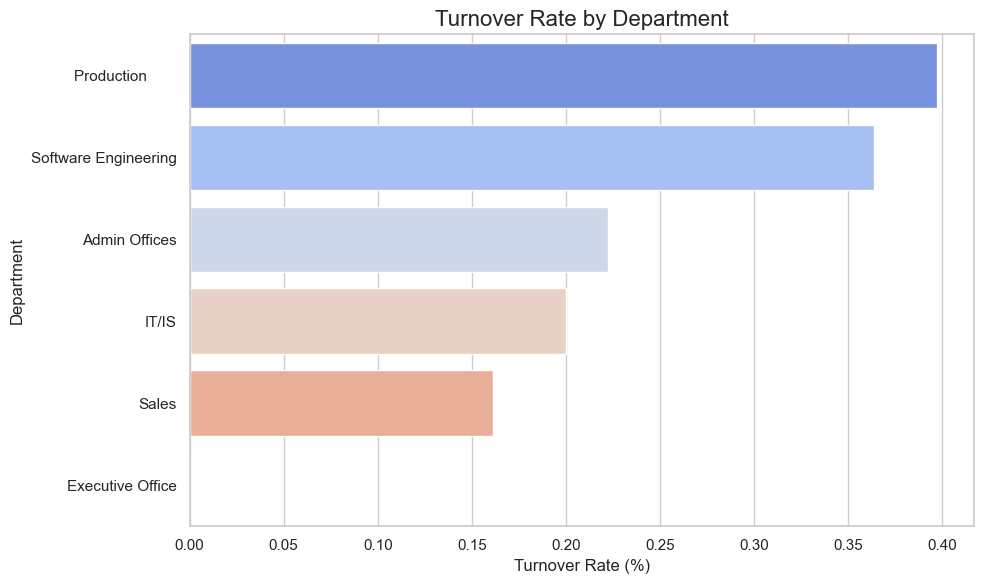

In [8]:
# Set up plot style
sns.set(style="whitegrid")

# 1. Turnover Rate by Department
plt.figure(figsize=(10, 6))
turnover_rate_by_dept = cleaned_hr_data.groupby('Department')['Turnover'].mean().sort_values(ascending=False)
sns.barplot(x=turnover_rate_by_dept.values, y=turnover_rate_by_dept.index, palette="coolwarm")
plt.title("Turnover Rate by Department", fontsize=16)
plt.xlabel("Turnover Rate (%)")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

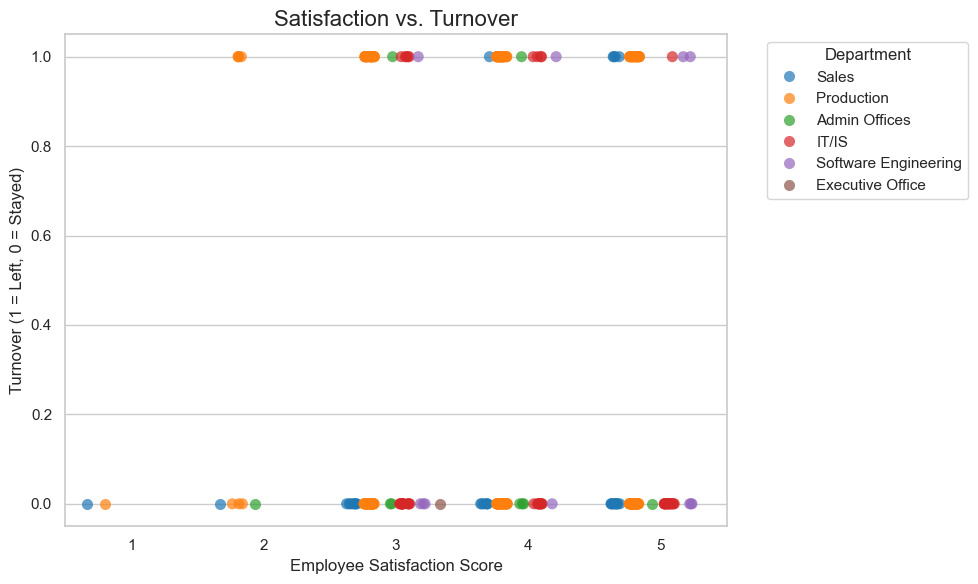

In [9]:
# Jitter Plot to visualize Satisfaction vs. Turnover with better spacing
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=cleaned_hr_data,
    x='EmpSatisfaction',
    y='Turnover',
    jitter=0.25,
    hue='Department',
    palette='tab10',
    dodge=True,
    alpha=0.7,
    size=8
)
plt.title("Satisfaction vs. Turnover", fontsize=16)
plt.xlabel("Employee Satisfaction Score")
plt.ylabel("Turnover (1 = Left, 0 = Stayed)")
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/97/w9b7ss_x2v9cnl2428tqps580000gn/T/ipykernel_11083/2565713768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


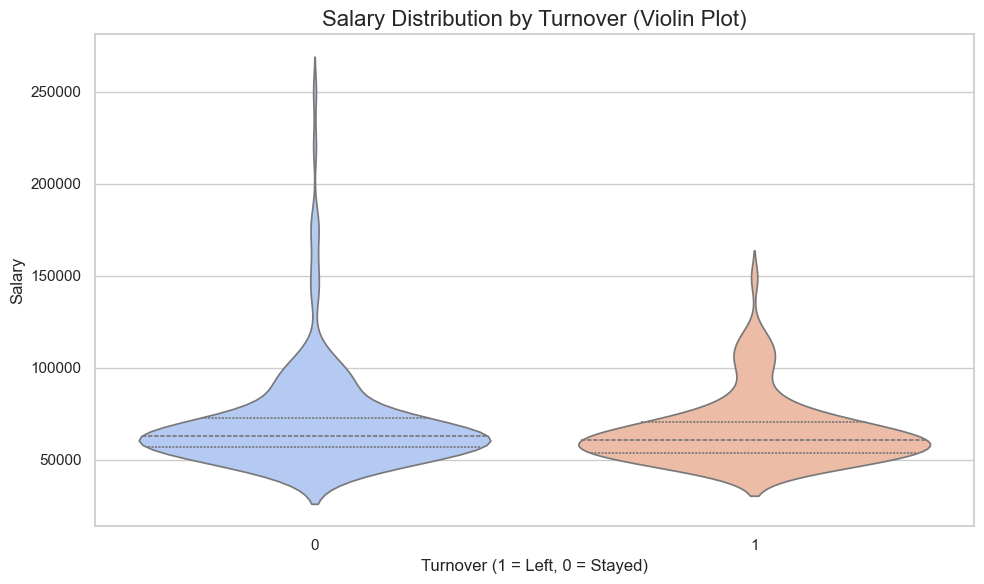

Mean Salary by Turnover:
 Turnover
0    70694.033816
1    65690.076923
Name: Salary, dtype: float64
Median Salary by Turnover:
 Turnover
0    63051.0
1    60547.0
Name: Salary, dtype: float64


In [10]:
# Violin Plot to visualize Salary Distribution by Turnover
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=cleaned_hr_data,
    x='Turnover',
    y='Salary',
    palette="coolwarm",
    inner='quartile'
)
# Add title and labels
plt.title("Salary Distribution by Turnover (Violin Plot)", fontsize=16)
plt.xlabel("Turnover (1 = Left, 0 = Stayed)")
plt.ylabel("Salary")
plt.tight_layout()
plt.show()

# Mean and Median Values
mean_salary = cleaned_hr_data.groupby('Turnover')['Salary'].mean()
median_salary = cleaned_hr_data.groupby('Turnover')['Salary'].median()
print("Mean Salary by Turnover:\n", mean_salary)
print("Median Salary by Turnover:\n", median_salary)


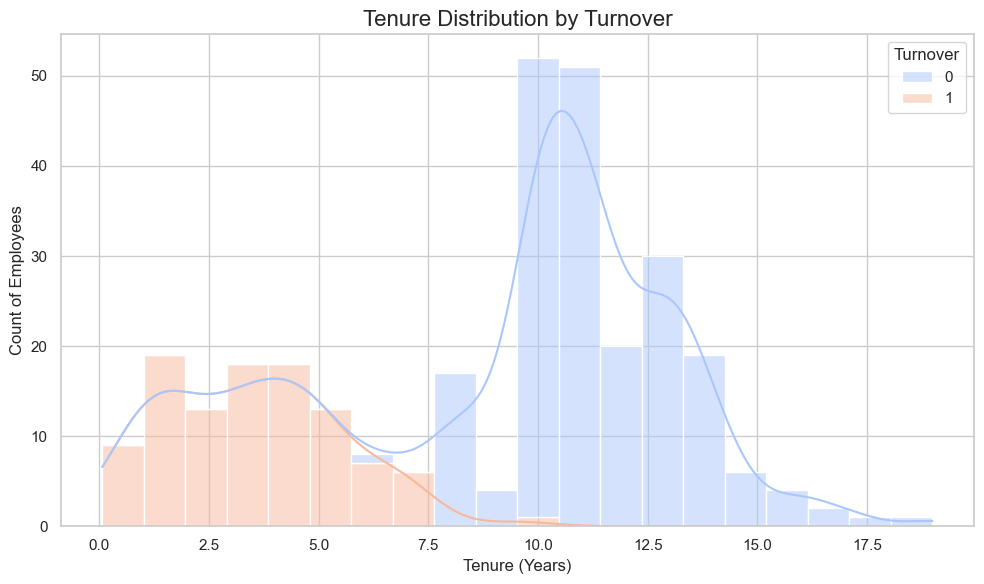

In [11]:
# 4. Tenure Distribution by Turnover (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_hr_data, x='TenureYears', hue='Turnover', kde=True, bins=20, palette="coolwarm", multiple="stack")
plt.title("Tenure Distribution by Turnover", fontsize=16)
plt.xlabel("Tenure (Years)")
plt.ylabel("Count of Employees")
plt.tight_layout()
plt.show()